In [1]:
import astropy.units as u
import numpy as np
import popsims
import matplotlib.pyplot as plt
import astropy.coordinates as astro_coord
import glob
import pandas as pd

import itertools
from scipy import stats

from popsims.plot_style import  plot_style
plot_style()

#from shapey import Box
#paths
path_plot ='../figures/'
path_data = '../data/stream/'
isochrone_path='../data/isochrones/'


In [2]:
vhalo=-50

In [3]:
def read_orbit_file(filename):
    return np.load(path_data+'/{}'.format(filename), allow_pickle=True)

def plot_density(st, grid, ax):
    vals=[]
    dx= grid[1]-grid[0]
    for g in grid:
        n= len(st.y[np.logical_and(st.y.value>=g,st.y.value<=g+dx)])
        vals.append(n/dx)
        
    ax.plot(grid, vals, linewidth=3)
    return 

def visualize_stream(rgc, xlim, ylim, xgrid):
    
    #unperturbed

    fig, (ax, ax1)=plt.subplots(figsize=(12, 4), ncols=2)
    filename='orgininalpal5_rgc{}'.format(rgc)
    f=path_data+'/{}.npy'.format(filename)
    filenames=np.array(glob.glob(f))
    st0=(read_orbit_file(filenames[-1].split('/')[-1]).flatten()[0])['stream']
    ax.scatter(st0.y.value, st0.x.value+1, s=.05, alpha=0.1, c='k')
    ax.text(3, np.nanmean(st0.x.value[st0.y.value>0])+1 ,
        "Unperturbed",c='b', fontsize=12)
    plot_density(st0, xgrid, ax1)
    
    
    mhalo=2e6
    filename='pal5_rgc{}_mhalo{:.2e}_vhalo{:.0f}'.format(rgc, mhalo, vhalo)
    f=path_data+'/{}.npy'.format(filename)
    filenames=np.array(glob.glob(f))
    st0=(read_orbit_file(filenames[-1].split('/')[-1]).flatten()[0])['stream']
    ax.scatter(st0.y.value, st0.x.value+2, s=.05, alpha=0.1, c='k')
    ax.text(3, np.nanmean(st0.x.value[st0.y.value>0]+2) ,
        " {:.0e} Msun".format(mhalo) ,c='b', fontsize=12)

    plot_density(st0, xgrid, ax1)

    mhalo=5e6
    filename='pal5_rgc{}_mhalo{:.2e}_vhalo{:.0f}'.format(rgc, mhalo, vhalo)
    f=path_data+'/{}.npy'.format(filename)
    filenames=np.array(glob.glob(f))
    st0=(read_orbit_file(filenames[-1].split('/')[-1]).flatten()[0])['stream']
    ax.scatter(st0.y.value, st0.x.value+3, s=.05, alpha=0.1, c='k')
    ax.text(3, np.nanmean(st0.x.value[st0.y.value>0]+3) ,
        " {:.0e} Msun".format(mhalo) ,c='b', fontsize=12)
    plot_density(st0, xgrid, ax1)

    mhalo=1e7
    filename='pal5_rgc{}_mhalo{:.2e}_vhalo{:.0f}'.format(rgc, mhalo, vhalo)
    f=path_data+'/{}.npy'.format(filename)
    filenames=np.array(glob.glob(f))
    st0=(read_orbit_file(filenames[-1].split('/')[-1]).flatten()[0])['stream']
    ax.scatter(st0.y.value, st0.x.value+4, s=.05, alpha=0.1, c='k')
    ax.text(3, np.nanmean(st0.x.value[st0.y.value>0]+4) ,
        " {:.0e} Msun".format(mhalo) ,c='b', fontsize=12)
    plot_density(st0, xgrid, ax1)


    ax.set(ylim=ylim, xlim=xlim)
    ax.set_xlabel('y (kpc)', fontsize=18)
    ax.set_ylabel('x (kpc) + offset', fontsize=18)
    ax.minorticks_on()

    ax1.set(xlim=xlim)
    ax1.set_xlabel('x (kpc)', fontsize=18)
    ax1.set_ylabel('Number of Stars/Kpc', fontsize=18)

    #add up/vertical arrrows 
    plt.tight_layout()
    
    ax1.minorticks_on()
    ax1.axvline (2.2, linestyle='--', color='k')

    plt.savefig(path_plot+'/streams_side_bysize.jpeg', bbox_inches='tight')


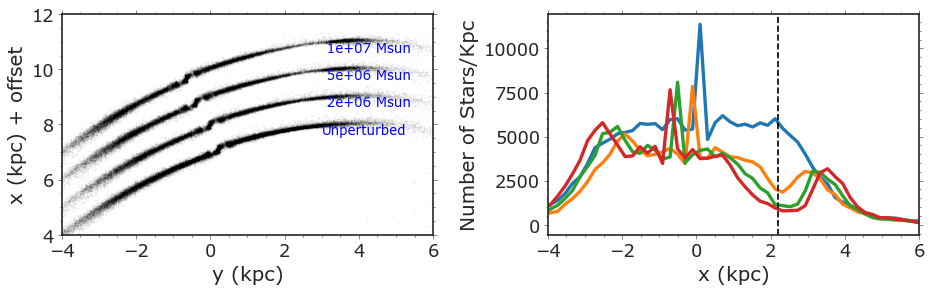

In [4]:
xgrid=np.linspace(-10, 10, 100)
#compare and contrast
visualize_stream('10_20', [-4, 6], [4., 12], xgrid)

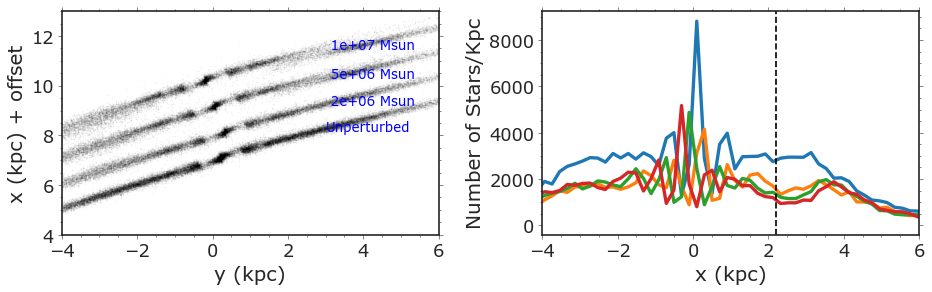

In [9]:
visualize_stream('30_40', [-4, -4+10], [4., 13], xgrid)

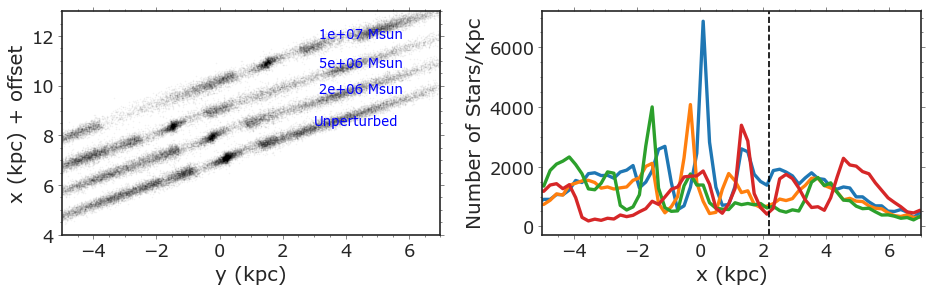

In [10]:
visualize_stream('50_60', [-5,-5+12], [4, 13], xgrid)